In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/harishkumardatalab/housing-price-prediction/Housing.csv


First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 54

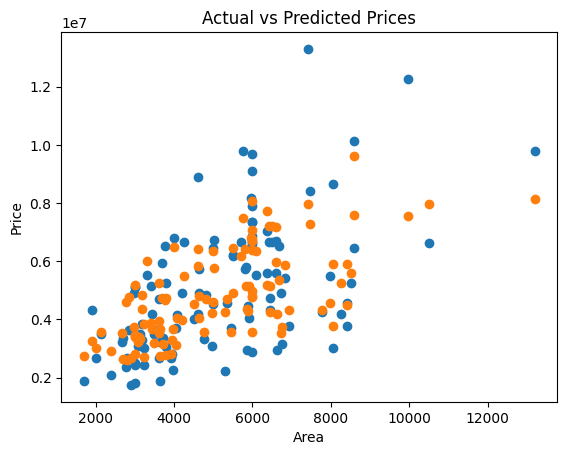

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset (Your Correct Path)
df = pd.read_csv("/kaggle/input/datasets/harishkumardatalab/housing-price-prediction/Housing.csv")

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("\nModel Evaluation:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nModel Coefficients:")
print(coefficients)
print("\nIntercept:", model.intercept_)

# Plot (if area exists)
if "area" in X.columns:
    plt.scatter(X_test["area"], y_test)
    plt.scatter(X_test["area"], y_pred)
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Actual vs Predicted Prices")
    plt.show()